In [1]:
# Specify values for spike time generation in this cell, the rest is automatic.
# See last cell for how to load the generated file elsewhere.

nNeurons = 1
rate = 12 # Hz
simLength = 10000 # ms

In [2]:
import ANNarchy as ann
import numpy as np

ANNarchy 4.6 (4.6.9.3) on darwin (posix). 


In [3]:
# Clears previous ANNarchy nets

ann.clear()

try:
    import shutil
    shutil.rmtree("./annarchy")
    print("Deleted previously compiled network!")
except:
    print("No previously compiled network to delete!")

Deleted previously compiled network!


In [4]:
# Define a PoissonPopulation to generate spikes
spikeGen = ann.PoissonPopulation(nNeurons, rates=rate)
m = ann.Monitor(spikeGen, "spike")

# Compile and simulate
ann.compile()
ann.simulate(simLength)

# Read the recorded spikes
spikes = m.get("spike")

# Convert from dictionary to list
spikes_list = list(spikes.values())

Compiling... 
OK 


In [5]:
# Save the list to a .txt file

import pickle

filename = "inputs/poisson_"+str(nNeurons)+"_n_"+str(int(rate))+"_Hz_"+str(simLength)+"_ms.txt"

with open(filename, 'wb') as fp:
    pickle.dump(spikes_list, fp)

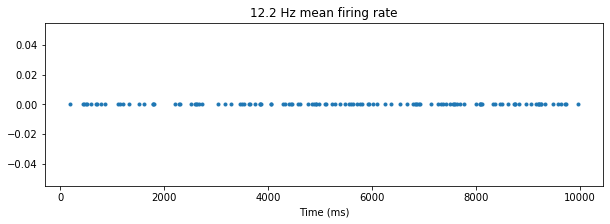

In [6]:
# Verify what was generated

from matplotlib import pyplot

spike_times, spike_senders = m.raster_plot(spikes)

pyplot.close("all")
mean_rate = m.mean_fr(spikes)
f1 = pyplot.figure(figsize=(10, 3))
pyplot.plot(spike_times, spike_senders, ".")
pyplot.xlabel("Time (ms)")
pyplot.title("%g Hz mean firing rate" % mean_rate)
pyplot.show()

In [7]:
# Use this code to load the list elsewhere
import pickle

filename = "poisson_"+str(nNeurons)+"_n_"+str(int(rate))+"_Hz_"+str(simLength)+"_ms.txt"

with open (filename, 'rb') as fp:
    spike_times = pickle.load(fp)

FileNotFoundError: [Errno 2] No such file or directory: 'poisson_1_n_12_Hz_10000_ms.txt'